                         drink  Volume (ml)  Calories  Caffeine (mg)    type
0                 Costa Coffee   256.993715         0            277  Coffee
1  Coffee Friend Brewed Coffee   250.191810         0            145  Coffee
2           Hell Energy Coffee   250.191810       150            100  Coffee
3           Killer Coffee (AU)   250.191810         0            430  Coffee
4                 Nescafe Gold   250.191810         0             66  Coffee
{'Linear Regression': 603.7877328459997, 'Decision Tree': 505.3497079952938, 'Support Vector Machine': 626.9542409359262, 'Random Forest': 398.1877848529804}


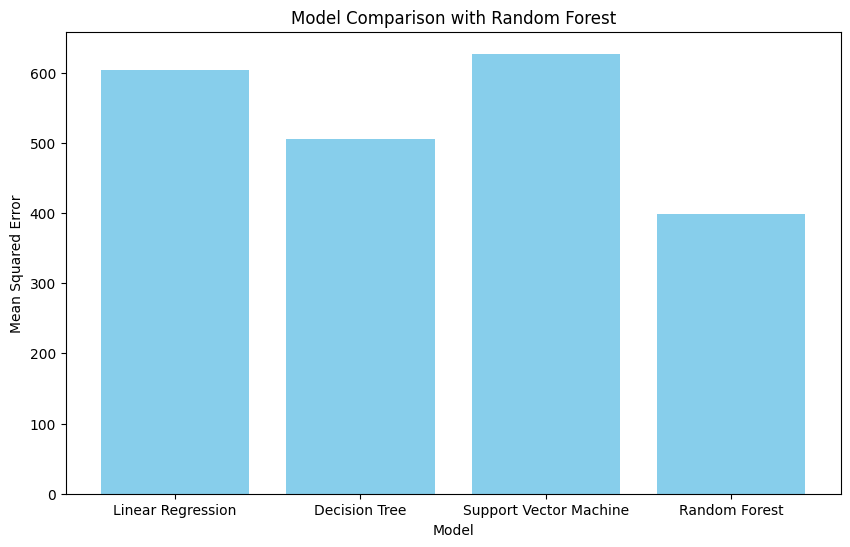

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# URL of the raw GitHub file
url = 'https://raw.githubusercontent.com/sajid1760/Caffeine-Analysis/main/caffeine.csv'

# Load the dataset
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Data Cleaning
data = data.dropna()

# Handle zero values in the 'Caffeine (mg)' column by adding a small constant
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace(0, 0.1)

# Create a synthetic target variable (e.g., hypothetical cognitive performance score)
np.random.seed(42)  # For reproducibility
data['Cognitive_Performance'] = (
    10 * np.log(data['Caffeine (mg)']) +
    np.random.normal(0, 1, len(data)) * data['Caffeine (mg)'] * 0.1
)

# Feature Selection
features = data[['Caffeine (mg)', 'Volume (ml)', 'Calories', 'type']]
target = data['Cognitive_Performance']

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['type'])

# Normalize the data
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),

    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate the models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results[model_name] = mse

# Print the results
print(results)

# Plot the results
model_names = list(results.keys())
mse_values = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison with Random Forest')
plt.savefig('model_comparison_rf.png')
plt.show()

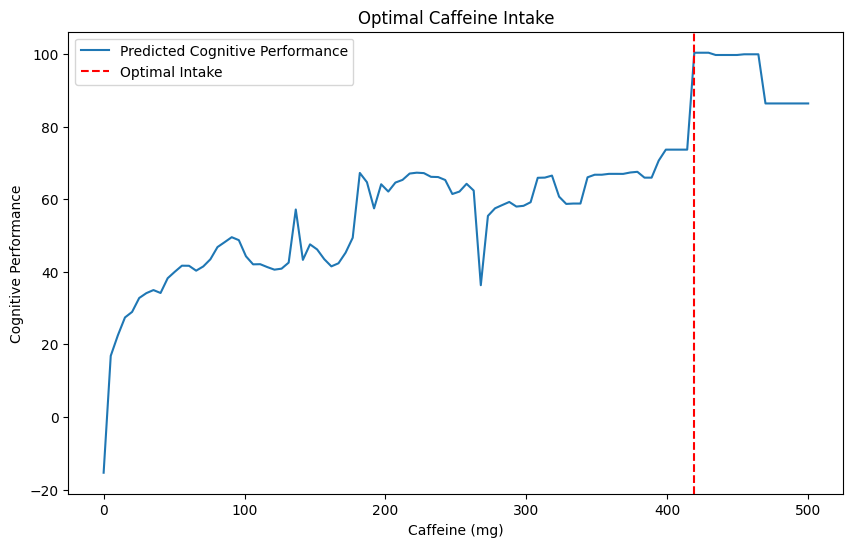

Optimal caffeine intake for maximum cognitive performance is approximately 419.19 mg.


In [5]:
# Generate caffeine intake range
caffeine_range = np.linspace(0, 500, 100)  # From 0 to 500 mg

# Create a dataframe for predictions
caffeine_df = pd.DataFrame({
    'Caffeine (mg)': caffeine_range,
    'Volume (ml)': 250,
    'Calories': 100,
    'type': ['Coffee'] * len(caffeine_range)
})
caffeine_df = pd.get_dummies(caffeine_df, columns=['type'])

# Get missing columns from training data
missing_cols = set(features.columns) - set(caffeine_df.columns)
for col in missing_cols:
    caffeine_df[col] = 0  # Add missing columns and fill with 0

# Ensure columns are in the same order as during training
caffeine_df = caffeine_df[features.columns]

caffeine_normalized = scaler.transform(caffeine_df)

# Use the best model (Random Forest) to predict
rf_model = models['Random Forest']
cognitive_performance_pred = rf_model.predict(caffeine_normalized)

# Plot caffeine intake vs. cognitive performance
plt.figure(figsize=(10, 6))
plt.plot(caffeine_range, cognitive_performance_pred, label='Predicted Cognitive Performance')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Cognitive Performance')
plt.title('Optimal Caffeine Intake')
plt.axvline(x=caffeine_range[np.argmax(cognitive_performance_pred)], color='red', linestyle='--', label='Optimal Intake')
plt.legend()
plt.savefig('optimal_caffeine_intake.png')
plt.show()

# Find the optimal caffeine intake
optimal_caffeine = caffeine_range[np.argmax(cognitive_performance_pred)]
print(f"Optimal caffeine intake for maximum cognitive performance is approximately {optimal_caffeine:.2f} mg.")

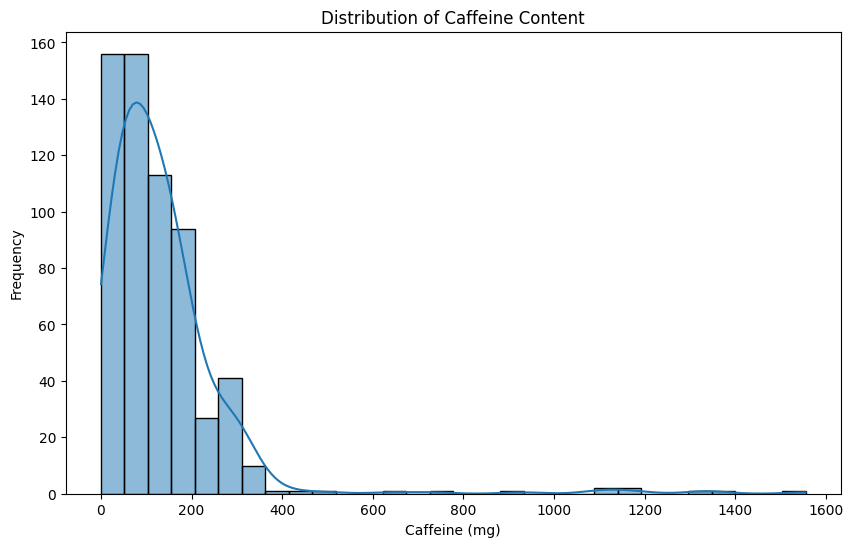

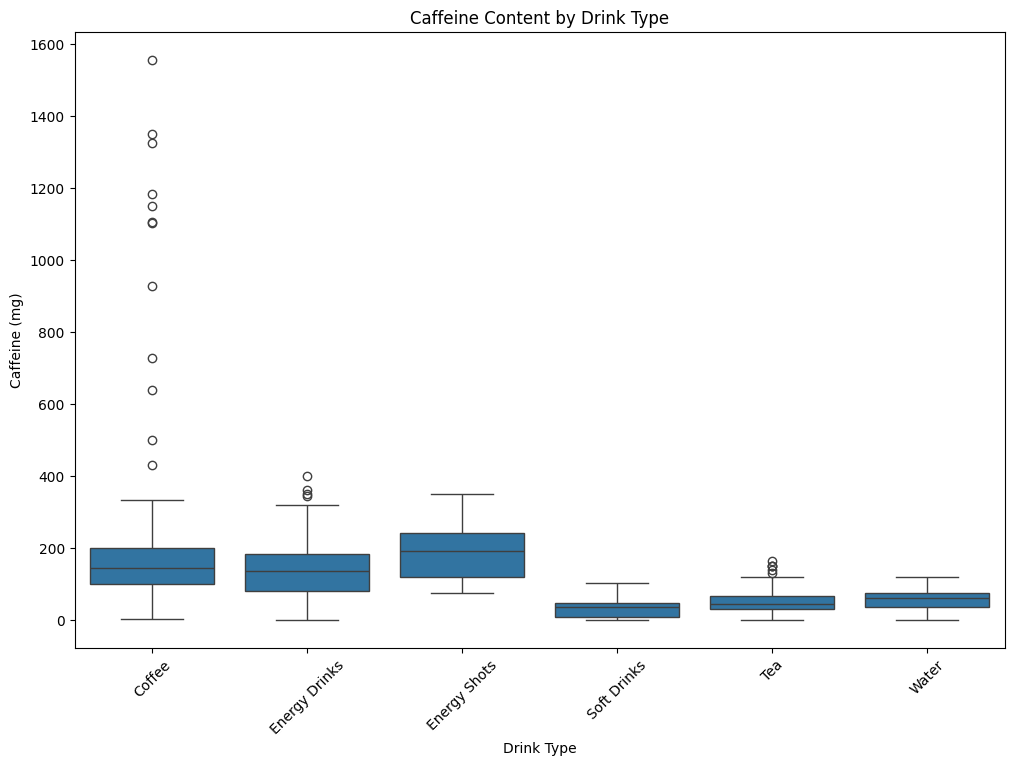

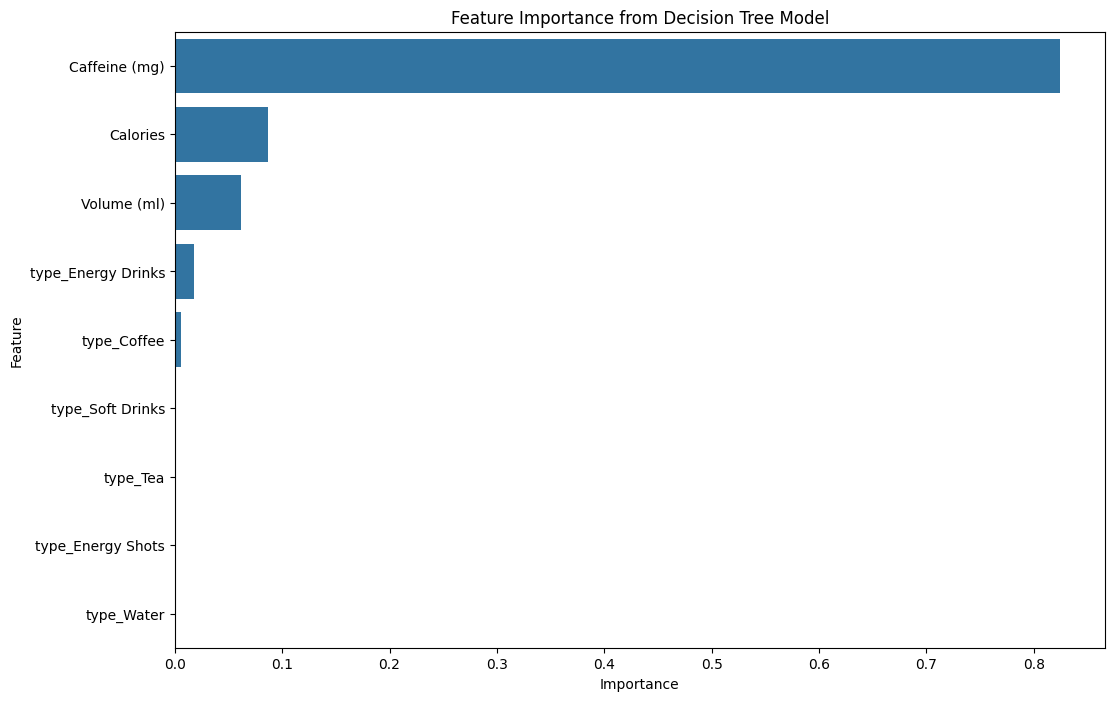

In [ ]:
import seaborn as sns

# Distribution of Caffeine Content
plt.figure(figsize=(10, 6))
sns.histplot(data['Caffeine (mg)'], bins=30, kde=True)
plt.title('Distribution of Caffeine Content')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Frequency')
plt.savefig('caffeine_distribution.png')
plt.show()

# Caffeine Content by Drink Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='Caffeine (mg)', data=data)
plt.title('Caffeine Content by Drink Type')
plt.xlabel('Drink Type')
plt.ylabel('Caffeine (mg)')
plt.xticks(rotation=45)
plt.savefig('caffeine_by_drink_type.png')
plt.show()

# Feature selection and preprocessing
features = data[['Caffeine (mg)', 'Volume (ml)', 'Calories', 'type']]
features = pd.get_dummies(features, columns=['type'])
target = data['Cognitive_Performance']
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Train Decision Tree model
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Feature importance
importances = dt_model.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png')
plt.show()